In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Load the data


In [3]:
data = pd.read_csv("/content/data_cleaned.csv")
data.shape

(891, 25)

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Segregating Variables: Independent and Dependent variables

In [5]:
x = data.drop(['Survived'] , axis = 1)
y = data['Survived']
x.shape , y.shape

((891, 24), (891,))

Splitting the data


In [18]:
#Importing the train test split

from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x , y , random_state = 56 , stratify = y )

In [19]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(668, 24)
(668,)
(223, 24)
(223,)


Scaling the data using the MinMax Scaler.

In [ ]:
#Importing the MinMax scaler.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

Implementing KNN classifier

In [20]:
#Importing KNN classifier and metric score f1 score.

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score



Implementing KNN classifier algorithm with k = 10


In [21]:
#Creating instance of KNN
clf = KNN(n_neighbors = 10)

#Fitting the model on training data.
clf.fit(train_x , train_y)

#Predicting over the Train set of test and calculating f1_score
test_predict = clf.predict(test_x)
k = f1_score(test_predict , test_y)
print('Test f1 score:' , k )


Test f1 score: 0.5314685314685315


Defining Elbow Curve

In [22]:
def Elbow(K):
    #Initiating empty list
    test_error = []

    #Training model for every value of K
    for i in K:
        #Instance of K
        clf = KNN(n_neighbors = i)
        clf.fit(train_x , train_y)
        #Appending f1_scores to the empty list calculated using predictions
        tmp = clf.predict(test_x)
        #error = np.mean(temp != test_y)

        tmp = f1_score(tmp,test_y)
        error = 1 - tmp
        test_error.append(error)
    return test_error
        

Using the above defined function


In [23]:
#Defining k range
k = range(6,20,2)


In [24]:
for i in k:
    print(i)

6
8
10
12
14
16
18


In [25]:
#Calling above defined function

test = Elbow(k)
test

[0.4965986394557823,
 0.489051094890511,
 0.46853146853146854,
 0.44594594594594594,
 0.40689655172413786,
 0.43065693430656937,
 0.43065693430656937]

In [28]:
#Getting the dataframe for the above calculation
new1 = pd.DataFrame({'k' : k , 'test_error' : test})
new1

,k,test_error
0,6,0.496599
1,8,0.489051
2,10,0.468531
3,12,0.445946
4,14,0.406897
5,16,0.430657
6,18,0.430657


In [30]:
#min(test)
#test[np.argmin(test)]
new1['k'][test == min(test)]

4    14
Name: k, dtype: int64

Plotting the Elbow_curve


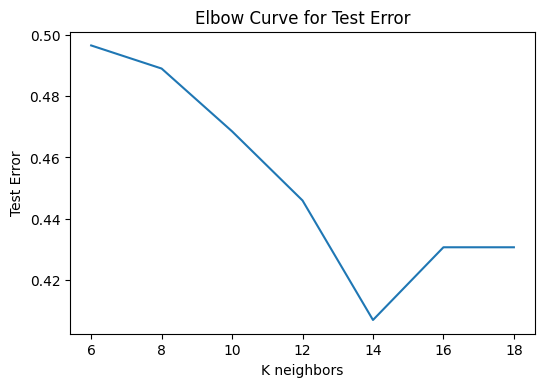

In [33]:
plt.figure(dpi = 100)
plt.plot(k , test)
plt.xlabel('K neighbors')
plt.ylabel('Test Error')
plt.title("Elbow Curve for Test Error")
plt.show()